<a href="https://colab.research.google.com/github/OjChi/DS-Lab/blob/main/Tutorial_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn import preprocessing

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Loading the dataset
Here I have loaded the California wildfire incidents dataset.

In [ ]:
california_fire_incidents = pd.read_csv('California_Fire_Incidents.csv')

In [ ]:
california_fire_incidents.columns

Index(['AcresBurned', 'Active', 'AdminUnit', 'AirTankers', 'ArchiveYear',
       'CalFireIncident', 'CanonicalUrl', 'ConditionStatement',
       'ControlStatement', 'Counties', 'CountyIds', 'CrewsInvolved', 'Dozers',
       'Engines', 'Extinguished', 'Fatalities', 'Featured', 'Final',
       'FuelType', 'Helicopters', 'Injuries', 'Latitude', 'Location',
       'Longitude', 'MajorIncident', 'Name', 'PercentContained',
       'PersonnelInvolved', 'Public', 'SearchDescription', 'SearchKeywords',
       'Started', 'Status', 'StructuresDamaged', 'StructuresDestroyed',
       'StructuresEvacuated', 'StructuresThreatened', 'UniqueId', 'Updated',
       'WaterTenders'],
      dtype='object')

Shape of the dataset

In [ ]:
california_fire_incidents.shape

(1636, 40)

# Exploratory Data analysis

Taking a look at a few of the data elements

In [ ]:
california_fire_incidents.head()

,AcresBurned,Active,AdminUnit,AirTankers,ArchiveYear,CalFireIncident,CanonicalUrl,ConditionStatement,ControlStatement,Counties,...,SearchKeywords,Started,Status,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated,WaterTenders
0,257314.0,False,Stanislaus National Forest/Yosemite National Park,NaN,2013,True,/incidents/2013/8/17/rim-fire/,NaN,NaN,Tuolumne,...,"Rim Fire, Stanislaus National Forest, Yosemite...",2013-08-17T15:25:00Z,Finalized,NaN,NaN,NaN,NaN,5fb18d4d-213f-4d83-a179-daaf11939e78,2013-09-06T18:30:00Z,NaN
1,30274.0,False,USFS Angeles National Forest/Los Angeles Count...,NaN,2013,True,/incidents/2013/5/30/powerhouse-fire/,NaN,NaN,Los Angeles,...,"Powerhouse Fire, May 2013, June 2013, Angeles ...",2013-05-30T15:28:00Z,Finalized,NaN,NaN,NaN,NaN,bf37805e-1cc2-4208-9972-753e47874c87,2013-06-08T18:30:00Z,NaN
2,27531.0,False,CAL FIRE Riverside Unit / San Bernardino Natio...,NaN,2013,True,/incidents/2013/7/15/mountain-fire/,NaN,NaN,Riverside,...,"Mountain Fire, July 2013, Highway 243, Highway...",2013-07-15T13:43:00Z,Finalized,NaN,NaN,NaN,NaN,a3149fec-4d48-427c-8b2c-59e8b79d59db,2013-07-30T18:00:00Z,NaN
3,27440.0,False,Tahoe National Forest,NaN,2013,False,/incidents/2013/8/10/american-fire/,NaN,NaN,Placer,...,"American Fire, August 2013, Deadwood Ridge, Fo...",2013-08-10T16:30:00Z,Finalized,NaN,NaN,NaN,NaN,8213f5c7-34fa-403b-a4bc-da2ace6e6625,2013-08-30T08:00:00Z,NaN
4,24251.0,False,Ventura County Fire/CAL FIRE,NaN,2013,True,/incidents/2013/5/2/springs-fire/,Acreage has been reduced based upon more accur...,NaN,Ventura,...,"Springs Fire, May 2013, Highway 101, Camarillo...",2013-05-02T07:01:00Z,Finalized,6.0,10.0,NaN,NaN,46731fb8-3350-4920-bdf7-910ac0eb715c,2013-05-11T06:30:00Z,11.0


Let us now see the statistics of the dataset

In [ ]:
california_fire_incidents.describe()

,AcresBurned,AirTankers,ArchiveYear,CrewsInvolved,Dozers,Engines,Fatalities,Helicopters,Injuries,Latitude,Longitude,PercentContained,PersonnelInvolved,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,WaterTenders
count,1633.000000,28.000000,1636.000000,171.000000,123.000000,191.000000,21.000000,84.000000,120.000000,1636.000000,1636.000000,1633.0,204.000000,67.000000,175.000000,0.0,30.000000,146.000000
mean,4589.443968,4.071429,2016.608802,11.561404,7.585366,23.565445,8.619048,5.357143,3.500000,37.203975,-108.082642,100.0,328.553922,67.970149,271.788571,NaN,522.800000,7.815068
std,27266.337722,6.399818,1.845340,14.455633,14.028616,41.004424,18.529642,7.265437,3.806231,135.401380,37.006927,0.0,521.138789,155.771975,1557.255963,NaN,739.586856,12.719251
min,0.000000,0.000000,2013.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-120.258000,-124.196290,100.0,0.000000,0.000000,0.000000,NaN,0.000000,1.000000
25%,35.000000,2.000000,2015.000000,2.500000,1.000000,5.000000,1.000000,1.000000,1.000000,34.165890,-121.768358,100.0,55.000000,1.000000,1.000000,NaN,0.000000,2.000000
50%,100.000000,2.000000,2017.000000,6.000000,2.000000,11.000000,3.000000,2.000000,3.000000,37.104065,-120.461560,100.0,151.500000,6.000000,7.000000,NaN,45.000000,4.000000
75%,422.000000,4.000000,2018.000000,13.500000,5.000000,24.000000,6.000000,5.000000,4.000000,39.086808,-117.474072,100.0,350.000000,49.500000,41.500000,NaN,1043.750000,6.000000
max,410203.000000,27.000000,2019.000000,82.000000,76.000000,256.000000,85.000000,29.000000,26.000000,5487.000000,118.908200,100.0,3100.000000,783.000000,18804.000000,NaN,2600.000000,79.000000


Now checking the datatypes and the null values

In [ ]:
california_fire_incidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1636 entries, 0 to 1635
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AcresBurned           1633 non-null   float64
 1   Active                1636 non-null   bool   
 2   AdminUnit             1636 non-null   object 
 3   AirTankers            28 non-null     float64
 4   ArchiveYear           1636 non-null   int64  
 5   CalFireIncident       1636 non-null   bool   
 6   CanonicalUrl          1636 non-null   object 
 7   ConditionStatement    284 non-null    object 
 8   ControlStatement      111 non-null    object 
 9   Counties              1636 non-null   object 
 10  CountyIds             1636 non-null   object 
 11  CrewsInvolved         171 non-null    float64
 12  Dozers                123 non-null    float64
 13  Engines               191 non-null    float64
 14  Extinguished          1577 non-null   object 
 15  Fatalities           

## Finding the null columns

In [ ]:
null_cols = []
for col in california_fire_incidents.columns:
    if california_fire_incidents[col].isnull().values.any():
        null_cols.append(col)

In [ ]:
null_cols

['AcresBurned',
 'AirTankers',
 'ConditionStatement',
 'ControlStatement',
 'CrewsInvolved',
 'Dozers',
 'Engines',
 'Extinguished',
 'Fatalities',
 'FuelType',
 'Helicopters',
 'Injuries',
 'PercentContained',
 'PersonnelInvolved',
 'SearchDescription',
 'SearchKeywords',
 'StructuresDamaged',
 'StructuresDestroyed',
 'StructuresEvacuated',
 'StructuresThreatened',
 'WaterTenders']

In [ ]:
for col in null_cols:
    print(col,len(california_fire_incidents[col].unique())-1)

AcresBurned 634
AirTankers 7
ConditionStatement 258
ControlStatement 92
CrewsInvolved 40
Dozers 24
Engines 54
Extinguished 1038
Fatalities 8
FuelType 8
Helicopters 17
Injuries 17
PercentContained 1
PersonnelInvolved 151
SearchDescription 1591
SearchKeywords 1382
StructuresDamaged 28
StructuresDestroyed 61
StructuresEvacuated 0
StructuresThreatened 14
WaterTenders 24


Finding the unique values in the null columns

In [ ]:
for col in null_cols:
    print(col,(california_fire_incidents[col].unique()))

AcresBurned [2.57314e+05 3.02740e+04 2.75310e+04 2.74400e+04 2.42510e+04 2.29920e+04
 2.02920e+04 1.47540e+04 1.25030e+04 1.14290e+04 8.07300e+03 7.05500e+03
 6.96500e+03 4.34600e+03 3.50500e+03 3.16600e+03 3.11100e+03 2.78100e+03
 2.46200e+03 2.23600e+03 2.06000e+03 1.98400e+03 1.70800e+03 1.38300e+03
 1.27100e+03 1.07000e+03 9.17000e+02 7.94000e+02 7.12000e+02 6.12000e+02
 5.72000e+02 5.34000e+02 5.13000e+02 5.10000e+02 5.02000e+02 5.00000e+02
 4.92000e+02 4.82000e+02 4.13000e+02 4.06000e+02 3.76000e+02 3.54000e+02
 3.11000e+02 3.05000e+02 3.03000e+02 2.98000e+02 2.96000e+02 2.74000e+02
 2.68000e+02 2.63000e+02 2.43000e+02 2.40000e+02 2.37000e+02 2.26000e+02
 2.17000e+02 2.13000e+02 2.00000e+02 1.96000e+02 1.95000e+02 1.90000e+02
 1.70000e+02 1.63000e+02 1.59000e+02 1.58000e+02 1.50000e+02 1.49000e+02
 1.34000e+02 1.25000e+02 1.24000e+02 1.20000e+02 1.16000e+02 1.10000e+02
 1.08000e+02 1.05000e+02 1.00000e+02 9.80000e+01 9.70000e+01 9.60000e+01
 9.40000e+01 9.20000e+01 9.10000e+01 9.

Differentiating numeric and non-numeric null columns

In [ ]:
numeric_null_cols = []
non_numeric_null_cols = []
for col in null_cols:
    print(col,(california_fire_incidents[col].dtype))
    numeric_null_cols.append(col) if np.issubdtype(california_fire_incidents[col].dtype,float) else non_numeric_null_cols.append(col)

AcresBurned float64
AirTankers float64
ConditionStatement object
ControlStatement object
CrewsInvolved float64
Dozers float64
Engines float64
Extinguished object
Fatalities float64
FuelType object
Helicopters float64
Injuries float64
PercentContained float64
PersonnelInvolved float64
SearchDescription object
SearchKeywords object
StructuresDamaged float64
StructuresDestroyed float64
StructuresEvacuated float64
StructuresThreatened float64
WaterTenders float64


In [ ]:
numeric_cols = []
non_numeric_cols = []
for col in california_fire_incidents.columns:
    print(col,(california_fire_incidents[col].dtype))
    numeric_cols.append(col) if np.issubdtype(california_fire_incidents[col].dtype,float) else non_numeric_cols.append(col)

AcresBurned float64
Active bool
AdminUnit object
AirTankers float64
ArchiveYear int64
CalFireIncident bool
CanonicalUrl object
ConditionStatement object
ControlStatement object
Counties object
CountyIds object
CrewsInvolved float64
Dozers float64
Engines float64
Extinguished object
Fatalities float64
Featured bool
Final bool
FuelType object
Helicopters float64
Injuries float64
Latitude float64
Location object
Longitude float64
MajorIncident bool
Name object
PercentContained float64
PersonnelInvolved float64
Public bool
SearchDescription object
SearchKeywords object
Started object
Status object
StructuresDamaged float64
StructuresDestroyed float64
StructuresEvacuated float64
StructuresThreatened float64
UniqueId object
Updated object
WaterTenders float64


In [ ]:
print(len(numeric_cols),len(non_numeric_cols),len(california_fire_incidents.columns))

17 23 40


## Data cleaning

Finding columns which have more than 50% null values so that they can be removed.

In [ ]:
cols_to_remove = []
for col in california_fire_incidents.columns:
    print(col)
    null_percentage = (california_fire_incidents[col].isna().sum()*100)/len(california_fire_incidents)
    print(null_percentage)
    if null_percentage > 50.0:
        cols_to_remove.append(col)
        print("To be removed")
    print()

AcresBurned
0.18337408312958436

Active
0.0

AdminUnit
0.0

AirTankers
98.2885085574572
To be removed

ArchiveYear
0.0

CalFireIncident
0.0

CanonicalUrl
0.0

ConditionStatement
82.64058679706602
To be removed

ControlStatement
93.21515892420538
To be removed

Counties
0.0

CountyIds
0.0

CrewsInvolved
89.54767726161369
To be removed

Dozers
92.48166259168704
To be removed

Engines
88.32518337408312
To be removed

Extinguished
3.606356968215159

Fatalities
98.71638141809291
To be removed

Featured
0.0

Final
0.0

FuelType
99.26650366748166
To be removed

Helicopters
94.86552567237163
To be removed

Injuries
92.66503667481662
To be removed

Latitude
0.0

Location
0.0

Longitude
0.0

MajorIncident
0.0

Name
0.0

PercentContained
0.18337408312958436

PersonnelInvolved
87.53056234718827
To be removed

Public
0.0

SearchDescription
1.039119804400978

SearchKeywords
12.408312958435207

Started
0.0

Status
0.0

StructuresDamaged
95.90464547677261
To be removed

StructuresDestroyed
89.30317848

In [ ]:
cols_to_remove

['AirTankers',
 'ConditionStatement',
 'ControlStatement',
 'CrewsInvolved',
 'Dozers',
 'Engines',
 'Fatalities',
 'FuelType',
 'Helicopters',
 'Injuries',
 'PersonnelInvolved',
 'StructuresDamaged',
 'StructuresDestroyed',
 'StructuresEvacuated',
 'StructuresThreatened',
 'WaterTenders']

In [ ]:
california_fire_incidents.drop(cols_to_remove,  axis='columns', inplace=True)

In [ ]:
california_fire_incidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1636 entries, 0 to 1635
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AcresBurned        1633 non-null   float64
 1   Active             1636 non-null   bool   
 2   AdminUnit          1636 non-null   object 
 3   ArchiveYear        1636 non-null   int64  
 4   CalFireIncident    1636 non-null   bool   
 5   CanonicalUrl       1636 non-null   object 
 6   Counties           1636 non-null   object 
 7   CountyIds          1636 non-null   object 
 8   Extinguished       1577 non-null   object 
 9   Featured           1636 non-null   bool   
 10  Final              1636 non-null   bool   
 11  Latitude           1636 non-null   float64
 12  Location           1636 non-null   object 
 13  Longitude          1636 non-null   float64
 14  MajorIncident      1636 non-null   bool   
 15  Name               1636 non-null   object 
 16  PercentContained   1633 

## Imputing null values

In [ ]:
categorical_columns = []
for col in california_fire_incidents.columns:
    if np.issubdtype(california_fire_incidents[col].dtype,object):
        print('\nCategorical')
        print(col,california_fire_incidents[col].mode()[0])
        california_fire_incidents[col] = california_fire_incidents[col].fillna(california_fire_incidents[col].mode()[0])
        categorical_columns.append(col)
    
    else:
        print('\nNon-categorical')
        print(col,california_fire_incidents[col].mean())
        california_fire_incidents[col] = california_fire_incidents[col].fillna(california_fire_incidents[col].median())


Non-categorical
AcresBurned 4589.4439681567665

Non-categorical
Active 0.0

Categorical
AdminUnit CAL FIRE Sonoma-Lake-Napa Unit

Non-categorical
ArchiveYear 2016.6088019559902

Non-categorical
CalFireIncident 0.7646699266503667

Categorical
CanonicalUrl /incidents/2013/6/10/sonoma-lake-napa-unit-lightning-fires/

Categorical
Counties Riverside

Categorical
CountyIds 33

Categorical
Extinguished 2018-01-09T13:46:00Z

Non-categorical
Featured 0.01589242053789731

Non-categorical
Final 0.9987775061124694

Non-categorical
Latitude 37.20397519564249

Categorical
Location off Highway 20 near Potter Valley, northeast of Ukiah 

Non-categorical
Longitude -108.08264222443425

Non-categorical
MajorIncident 0.2341075794621027

Categorical
Name Creek Fire

Non-categorical
PercentContained 100.0

Non-categorical
Public 1.0

Categorical
SearchDescription The Ranch Fire started July 27, 2018 off Highway 20 near Potter Valley, northeast of Ukiah (Mendocino County). This fire was contained on Septemb

## Encoding categorical values

In [ ]:
labelencoder = preprocessing.LabelEncoder()

for col in categorical_columns:
    california_fire_incidents[col] = labelencoder.fit_transform(california_fire_incidents[col])

In [ ]:
# california_fire_incidents.fillna({'AcresBurned': 0, 'AirTankers': 0, 'ConditionStatement':'', 'ControlStatement':'', 
#                 'CrewsInvolved': 0, 'Dozers': 0, 'Engines': 0, 'Extinguished': 0, 'Fatalities': 0,
#                'FuelType':'', 'Helicopters': 0, 'Injuries': 0, 'PersonnelInvolved': 0,
#                'SearchDescription':'', 'StructuresDamaged': 0, 'StructuresDestroyed': 0,
#                'StructuresEvacuated': 0, 'StructuresThreatened': 0, 'WaterTenders': 0}, inplace=True)

# EDA after First Stage of Cleaning 

AcresBurned


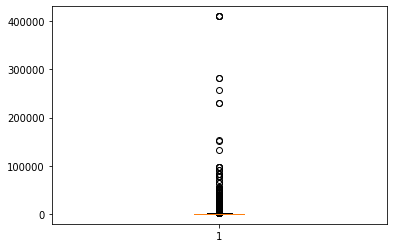

Active


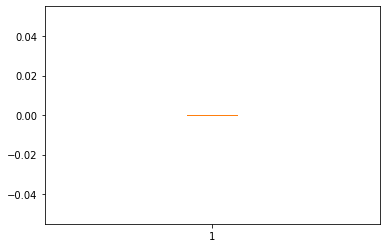

AdminUnit


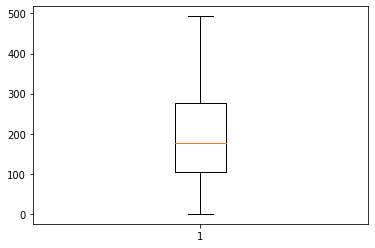

ArchiveYear


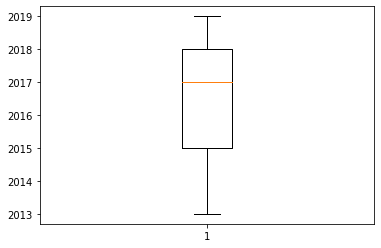

CalFireIncident


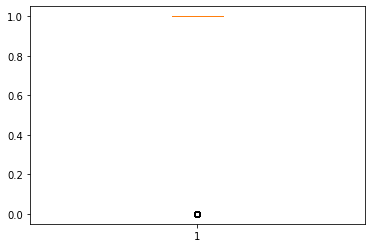

CanonicalUrl


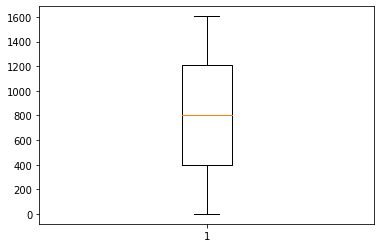

Counties


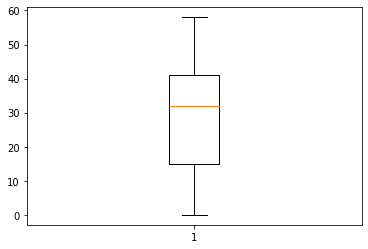

CountyIds


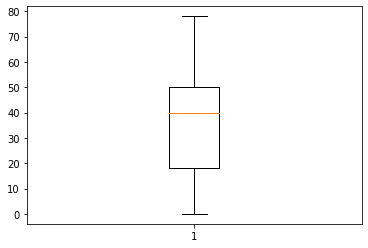

Extinguished


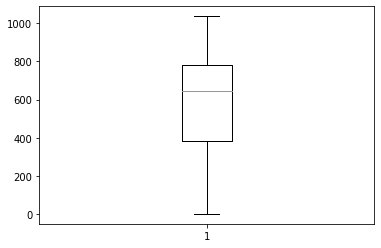

Featured


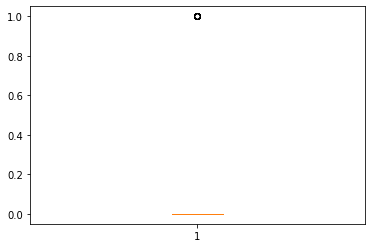

Final


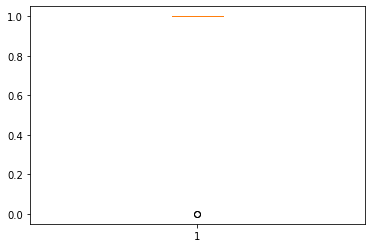

Latitude


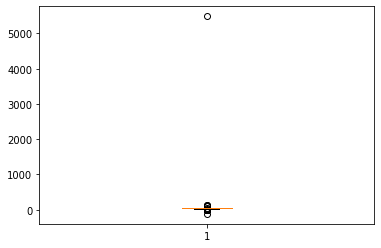

Location


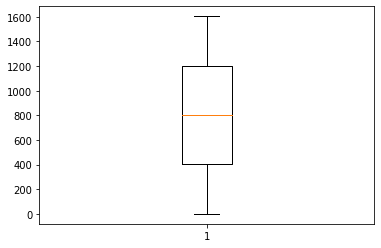

Longitude


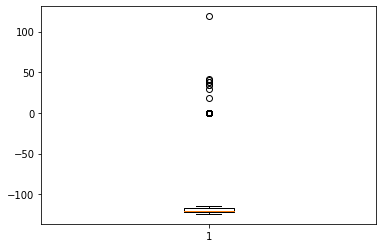

MajorIncident


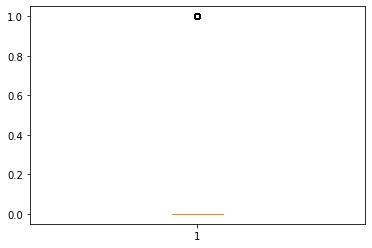

Name


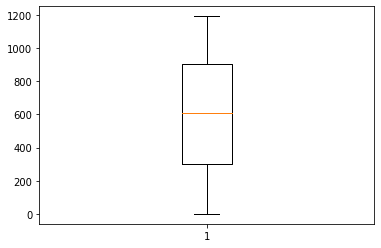

PercentContained


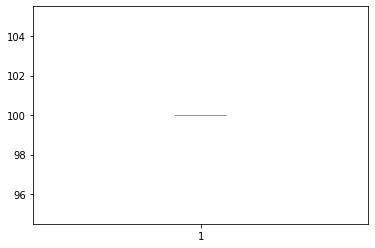

Public


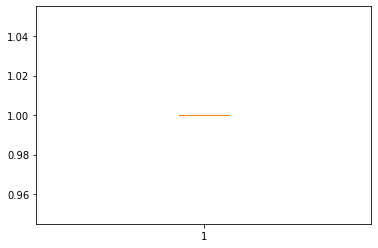

SearchDescription


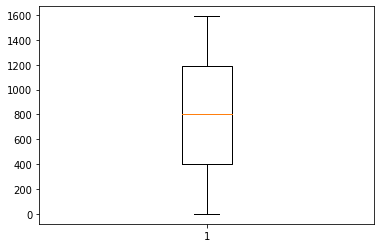

SearchKeywords


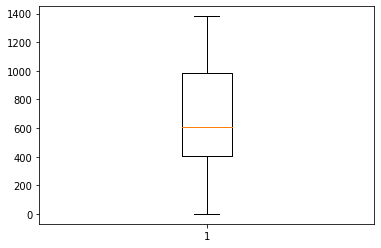

Started


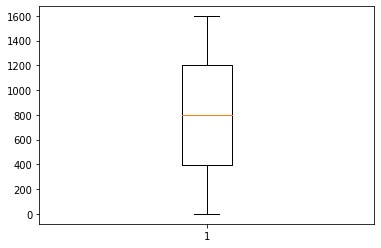

Status


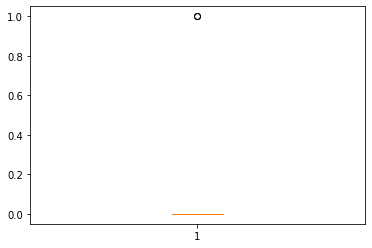

UniqueId


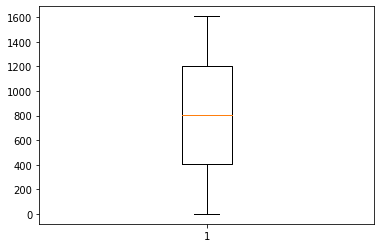

Updated


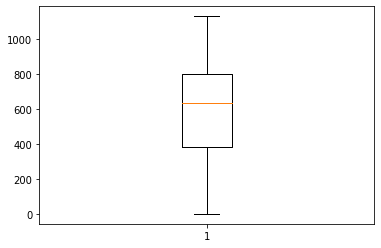

In [ ]:
for col in california_fire_incidents.columns:
    print(col)
    plt.boxplot(california_fire_incidents[col])
    plt.show()

Now we can see that there are many outliers

In [ ]:
california_fire_incidents.columns

Index(['AcresBurned', 'Active', 'AdminUnit', 'ArchiveYear', 'CalFireIncident',
       'CanonicalUrl', 'Counties', 'CountyIds', 'Extinguished', 'Featured',
       'Final', 'Latitude', 'Location', 'Longitude', 'MajorIncident', 'Name',
       'PercentContained', 'Public', 'SearchDescription', 'SearchKeywords',
       'Started', 'Status', 'UniqueId', 'Updated'],
      dtype='object')

In [ ]:
for col in california_fire_incidents.columns:
    print(col,(california_fire_incidents[col].unique()))

AcresBurned [2.57314e+05 3.02740e+04 2.75310e+04 2.74400e+04 2.42510e+04 2.29920e+04
 2.02920e+04 1.47540e+04 1.25030e+04 1.14290e+04 8.07300e+03 7.05500e+03
 6.96500e+03 4.34600e+03 3.50500e+03 3.16600e+03 3.11100e+03 2.78100e+03
 2.46200e+03 2.23600e+03 2.06000e+03 1.98400e+03 1.70800e+03 1.38300e+03
 1.27100e+03 1.07000e+03 9.17000e+02 7.94000e+02 7.12000e+02 6.12000e+02
 5.72000e+02 5.34000e+02 5.13000e+02 5.10000e+02 5.02000e+02 5.00000e+02
 4.92000e+02 4.82000e+02 4.13000e+02 4.06000e+02 3.76000e+02 3.54000e+02
 3.11000e+02 3.05000e+02 3.03000e+02 2.98000e+02 2.96000e+02 2.74000e+02
 2.68000e+02 2.63000e+02 2.43000e+02 2.40000e+02 2.37000e+02 2.26000e+02
 2.17000e+02 2.13000e+02 2.00000e+02 1.96000e+02 1.95000e+02 1.90000e+02
 1.70000e+02 1.63000e+02 1.59000e+02 1.58000e+02 1.50000e+02 1.49000e+02
 1.34000e+02 1.25000e+02 1.24000e+02 1.20000e+02 1.16000e+02 1.10000e+02
 1.08000e+02 1.05000e+02 1.00000e+02 9.80000e+01 9.70000e+01 9.60000e+01
 9.40000e+01 9.20000e+01 9.10000e+01 9.

ArchiveYear [2013 2014 2015 2016 2017 2018 2019]
CalFireIncident [ True False]
CanonicalUrl [ 120   52   83 ... 1400 1365 1357]
Counties [55 17 32 30 56  9 45 11 52 43 36 13 47  6  3 54 40 20 26  8 35 31 24 38
 18 12 27 34 37 15  0 10 57 33 48 46 22 21 16  2 58 28 41  4 39 29  5 53
  7 25  1 51 14 44 42 19 23 50 49]
CountyIds [63 13 36 34 64  2 53  4 60 50 41  8 55 74 43 62 46 18 37 23  7 76 40 35
 21 44 16  5 25 39 42 10  1  3 65 78 58 54 20 19 12 31 66 30 48 57 45 33
 56 26 32 61  0 75 11  6 22 38 15 77 59 47 28 27  9 24 52 49 68 17 69 51
 14 29 70 72 71 67 73]
Extinguished [ 118   40   84 ...  874 1000  890]
Featured [False  True]
Final [ True False]
Latitude [37.857    34.585595 33.7095   ... 38.734634 33.351145 33.45148 ]
Location [ 43  72 413 ... 204 614 504]
Longitude [-120.086    -118.423176 -116.72885  ... -121.729691 -117.403719
 -116.05898 ]
MajorIncident [False  True]
Name [904 847 735 ... 174 188 547]
PercentContained [100.]
Public [ True]
SearchDescription [1217 1142  985

In [ ]:
for col in california_fire_incidents.columns:
    print(f'''{col}:
length: {len(california_fire_incidents[col].unique())}, 
minimum: {min(california_fire_incidents[col].unique())}, 
maximum: {max(california_fire_incidents[col].unique())}
''')

AcresBurned:
length: 634, 
minimum: 0.0, 
maximum: 410203.0

Active:
length: 1, 
minimum: False, 
maximum: False

AdminUnit:
length: 494, 
minimum: 0, 
maximum: 493

ArchiveYear:
length: 7, 
minimum: 2013, 
maximum: 2019

CalFireIncident:
length: 2, 
minimum: False, 
maximum: True

CanonicalUrl:
length: 1607, 
minimum: 0, 
maximum: 1606

Counties:
length: 59, 
minimum: 0, 
maximum: 58

CountyIds:
length: 79, 
minimum: 0, 
maximum: 78

Extinguished:
length: 1038, 
minimum: 0, 
maximum: 1037

Featured:
length: 2, 
minimum: False, 
maximum: True

Final:
length: 2, 
minimum: False, 
maximum: True

Latitude:
length: 1441, 
minimum: -120.258, 
maximum: 5487.0

Location:
length: 1606, 
minimum: 0, 
maximum: 1605

Longitude:
length: 1448, 
minimum: -124.19628999999999, 
maximum: 118.9082

MajorIncident:
length: 2, 
minimum: False, 
maximum: True

Name:
length: 1193, 
minimum: 0, 
maximum: 1192

PercentContained:
length: 1, 
minimum: 100.0, 
maximum: 100.0

Public:
length: 1, 
minimum: True, 
m

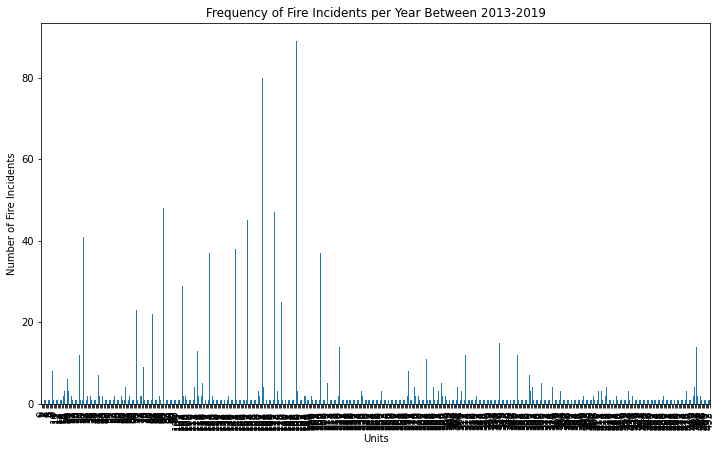

In [ ]:
california_fire_incidents['AdminUnit'].value_counts().sort_index().plot(kind='bar', figsize=(12,7))

plt.xlabel('Units')
plt.ylabel('Number of Fire Incidents')
plt.title('Frequency of Fire Incidents per Year Between 2013-2019');

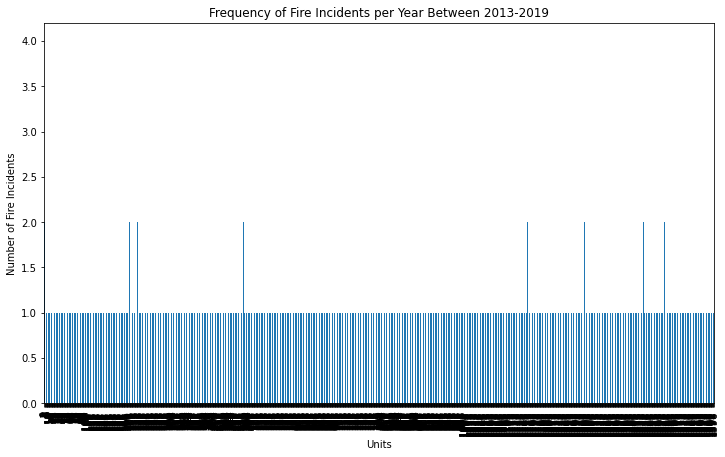

In [ ]:
california_fire_incidents['Started'].value_counts().sort_index().plot(kind='bar', figsize=(12,7))

plt.xlabel('Units')
plt.ylabel('Number of Fire Incidents')
plt.title('Frequency of Fire Incidents per Year Between 2013-2019');

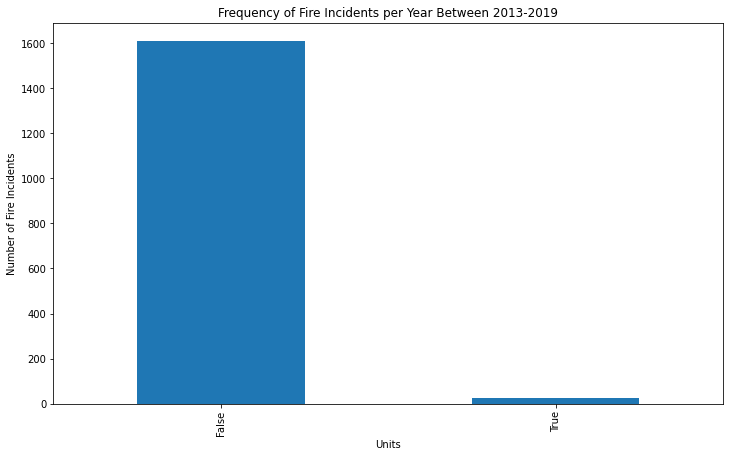

In [ ]:
california_fire_incidents['Featured'].value_counts().sort_index().plot(kind='bar', figsize=(12,7))

plt.xlabel('Units')
plt.ylabel('Number of Fire Incidents')
plt.title('Frequency of Fire Incidents per Year Between 2013-2019');

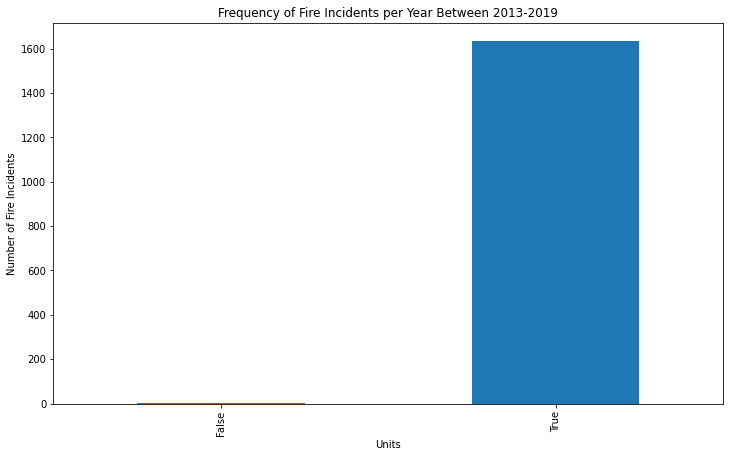

In [ ]:
california_fire_incidents['Final'].value_counts().sort_index().plot(kind='bar', figsize=(12,7))

plt.xlabel('Units')
plt.ylabel('Number of Fire Incidents')
plt.title('Frequency of Fire Incidents per Year Between 2013-2019');

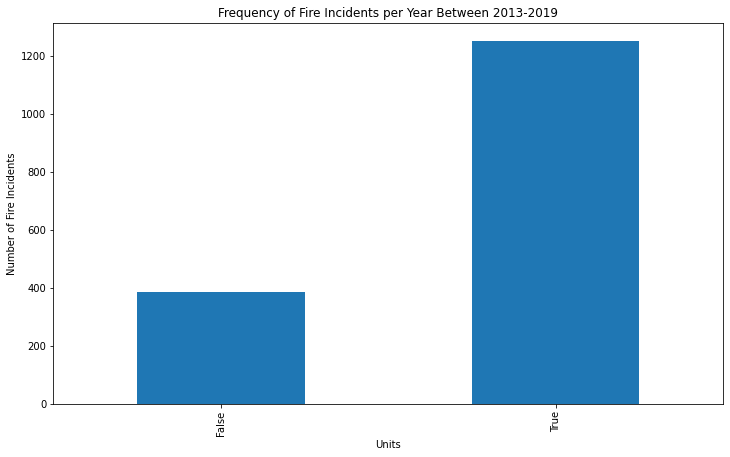

In [ ]:
california_fire_incidents['CalFireIncident'].value_counts().sort_index().plot(kind='bar', figsize=(12,7))

plt.xlabel('Units')
plt.ylabel('Number of Fire Incidents')
plt.title('Frequency of Fire Incidents per Year Between 2013-2019');

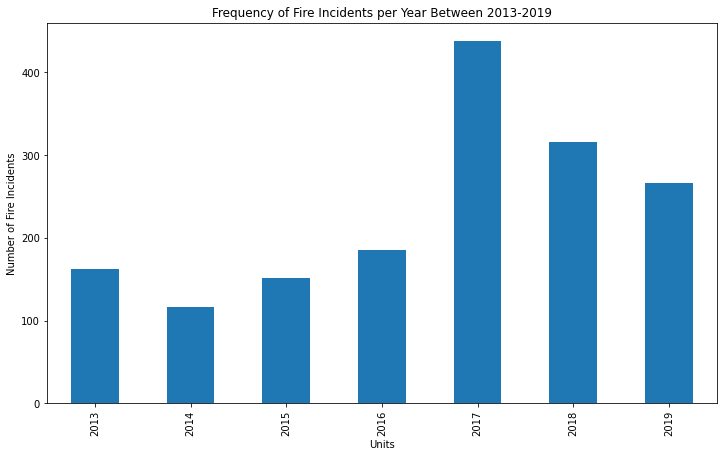

In [ ]:
california_fire_incidents['ArchiveYear'].value_counts().sort_index().plot(kind='bar', figsize=(12,7))

plt.xlabel('Units')
plt.ylabel('Number of Fire Incidents')
plt.title('Frequency of Fire Incidents per Year Between 2013-2019');

Binned bar graphs

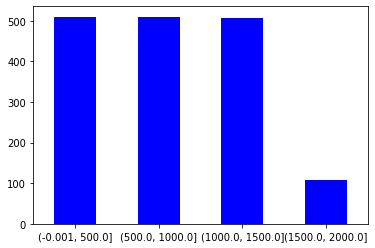

In [ ]:
out = pd.cut(california_fire_incidents['Location'], bins=[0, 500, 1000, 1500, 2000], include_lowest=True)
ax = out.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(6,4))
# ax.set_xticklabels([c[1:-1].replace(","," to") for c in out.cat.categories])
plt.show()

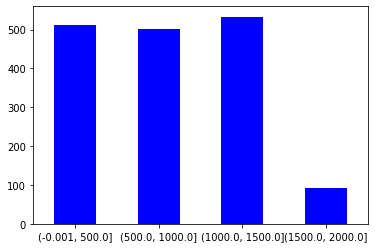

In [ ]:
out = pd.cut(california_fire_incidents['SearchDescription'], bins=[0, 500, 1000, 1500, 2000], include_lowest=True)
ax = out.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(6,4))
# ax.set_xticklabels([c[1:-1].replace(","," to") for c in out.cat.categories])
plt.show()

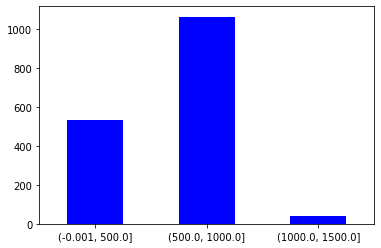

In [ ]:
out = pd.cut(california_fire_incidents['Extinguished'], bins=[0, 500, 1000, 1500], include_lowest=True)
ax = out.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(6,4))
# ax.set_xticklabels([c[1:-1].replace(","," to") for c in out.cat.categories])
plt.show()

Line Plots to see the trends

In [ ]:
california_fire_incidents.columns

Index(['AcresBurned', 'Active', 'AdminUnit', 'ArchiveYear', 'CalFireIncident',
       'CanonicalUrl', 'Counties', 'CountyIds', 'Extinguished', 'Featured',
       'Final', 'Latitude', 'Location', 'Longitude', 'MajorIncident', 'Name',
       'PercentContained', 'Public', 'SearchDescription', 'SearchKeywords',
       'Started', 'Status', 'UniqueId', 'Updated'],
      dtype='object')

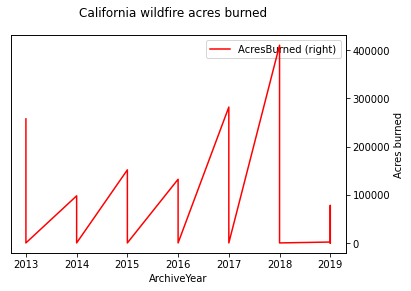

In [ ]:
ax = plt.gca()
california_fire_incidents.plot(secondary_y=True,kind='line',x='ArchiveYear',y='AcresBurned',color='red', ax=ax)
plt.ylabel("Acres burned")
plt.suptitle("California wildfire acres burned")
plt.show()

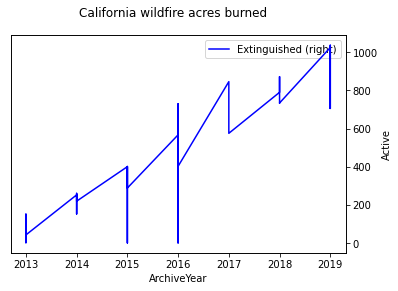

In [ ]:
ax = plt.gca()
california_fire_incidents.plot(secondary_y=True,kind='line',x='ArchiveYear',y='Extinguished',color='blue', ax=ax)
plt.ylabel("Active")
plt.suptitle("California wildfire acres burned")
plt.show()

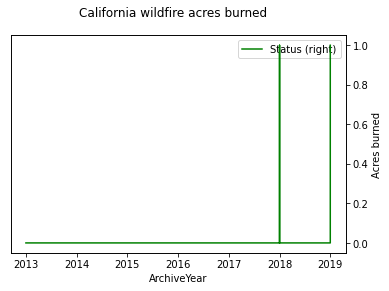

In [ ]:
ax = plt.gca()
california_fire_incidents.plot(secondary_y=True,kind='line',x='ArchiveYear',y='Status',color='green', ax=ax)
plt.ylabel("Acres burned")
plt.suptitle("California wildfire acres burned")
plt.show()

# Removing Outliers

In [ ]:
california_fire_incidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1636 entries, 0 to 1635
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AcresBurned        1636 non-null   float64
 1   Active             1636 non-null   bool   
 2   AdminUnit          1636 non-null   int32  
 3   ArchiveYear        1636 non-null   int64  
 4   CalFireIncident    1636 non-null   bool   
 5   CanonicalUrl       1636 non-null   int32  
 6   Counties           1636 non-null   int32  
 7   CountyIds          1636 non-null   int32  
 8   Extinguished       1636 non-null   int32  
 9   Featured           1636 non-null   bool   
 10  Final              1636 non-null   bool   
 11  Latitude           1636 non-null   float64
 12  Location           1636 non-null   int32  
 13  Longitude          1636 non-null   float64
 14  MajorIncident      1636 non-null   bool   
 15  Name               1636 non-null   int32  
 16  PercentContained   1636 

In [ ]:
california_fire_incidents.describe()

,AcresBurned,AdminUnit,ArchiveYear,CanonicalUrl,Counties,CountyIds,Extinguished,Latitude,Location,Longitude,Name,PercentContained,SearchDescription,SearchKeywords,Started,Status,UniqueId,Updated
count,1636.000000,1636.000000,1636.000000,1636.000000,1636.000000,1636.000000,1636.000000,1636.000000,1636.000000,1636.000000,1636.000000,1636.0,1636.000000,1636.000000,1636.000000,1636.000000,1636.000000,1636.000000
mean,4581.211491,198.351467,2016.608802,802.376528,28.516504,36.344743,580.346577,37.203975,803.964548,-108.082642,607.093521,100.0,800.639364,681.465770,797.993888,0.001222,803.836186,599.882641
std,27241.988777,121.360345,1.845340,464.373711,15.889037,20.387013,266.793072,135.401380,463.184355,37.006927,345.474686,0.0,459.536031,372.069147,462.066036,0.034953,462.786468,291.028443
min,0.000000,0.000000,2013.000000,0.000000,0.000000,0.000000,0.000000,-120.258000,0.000000,-124.196290,0.000000,100.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,104.000000,2015.000000,400.750000,15.000000,18.000000,380.750000,34.165890,404.750000,-121.768358,301.750000,100.0,401.750000,402.750000,396.750000,0.000000,404.750000,381.750000
50%,100.000000,177.000000,2017.000000,803.500000,32.000000,40.000000,643.000000,37.104065,804.500000,-120.461560,610.000000,100.0,806.500000,610.000000,799.500000,0.000000,805.500000,637.500000
75%,420.500000,277.000000,2018.000000,1206.250000,41.000000,50.000000,783.250000,39.086808,1204.250000,-117.474072,906.250000,100.0,1193.250000,984.250000,1201.250000,0.000000,1201.250000,801.000000
max,410203.000000,493.000000,2019.000000,1606.000000,58.000000,78.000000,1037.000000,5487.000000,1605.000000,118.908200,1192.000000,100.0,1590.000000,1381.000000,1596.000000,1.000000,1608.000000,1133.000000


Removing the rows whose values are more than 3 standard deviations away from the mean

In [ ]:
# calculate summary statistics
number_of_columns_dropped = 0
for col in california_fire_incidents.columns:
    data_mean, data_std = np.mean(california_fire_incidents[col]), np.std(california_fire_incidents[col])
    # identify outliers
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    
    print(f'\nDropping from {col} - Lower {lower} and Upper {upper}')

    # identify outliers
    outliers = [x for x in california_fire_incidents[col] if x < lower or x > upper]

    for ind in california_fire_incidents.index:
    #     print(df['Name'][ind], df['Stream'][ind])
        if california_fire_incidents[col][ind] < lower or california_fire_incidents[col][ind] > upper:
            print(f'{california_fire_incidents[col][ind]}')
            california_fire_incidents.drop(ind,inplace=True)
            number_of_columns_dropped+=1


Dropping from AcresBurned - Lower -77119.77364799836 and Upper 86282.19663088345
257314.0
97717.0
151623.0
132127.0
281893.0
281893.0
410203.0
410203.0
410203.0
410203.0
229651.0
229651.0
153336.0
96949.0
96949.0
96901.0
90288.0
90288.0

Dropping from Active - Lower 0.0 and Upper 0.0

Dropping from AdminUnit - Lower -163.24020558077456 and Upper 555.9348903768191

Dropping from ArchiveYear - Lower 2011.0614090398994 and Upper 2022.145018648605

Dropping from CalFireIncident - Lower -0.5119040598165874 and Upper 2.0384800795940903

Dropping from CanonicalUrl - Lower -593.8478456432372 and Upper 2195.72300015498

Dropping from Counties - Lower -19.01077465080389 and Upper 76.03426043572355

Dropping from CountyIds - Lower -24.75957110564685 and Upper 97.28985540725378

Dropping from Extinguished - Lower -221.98673313301765 and Upper 1380.2339519216455

Dropping from Featured - Lower -0.3611561921195408 and Upper 0.3932946346411725
True
True
True
True
True
True
True
True
True
True
True
T

In [ ]:
number_of_columns_dropped

56

In [ ]:
california_fire_incidents.describe()

,AcresBurned,AdminUnit,ArchiveYear,CanonicalUrl,Counties,CountyIds,Extinguished,Latitude,Location,Longitude,Name,PercentContained,SearchDescription,SearchKeywords,Started,Status,UniqueId,Updated
count,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.0,1580.000000,1580.000000,1580.000000,1580.0,1580.000000,1580.000000
mean,2252.472152,196.360759,2016.570886,792.306962,28.524684,36.216456,575.071519,33.550657,807.776582,-108.580352,604.621519,100.0,796.440506,680.634810,785.539873,0.0,806.948101,590.465190
std,8644.892071,119.750734,1.836417,461.608254,15.841721,20.335625,265.831399,11.982493,463.371307,35.744326,345.809793,0.0,460.287528,374.693934,456.651932,0.0,463.507882,286.003329
min,0.000000,0.000000,2013.000000,0.000000,0.000000,0.000000,0.000000,-120.258000,0.000000,-124.196290,0.000000,100.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,35.000000,104.000000,2015.000000,394.750000,15.000000,18.000000,373.750000,34.148187,408.750000,-121.765403,298.750000,100.0,394.750000,394.750000,390.750000,0.0,406.750000,374.750000
50%,98.500000,177.000000,2017.000000,790.500000,32.000000,40.000000,639.000000,37.084205,810.500000,-120.467780,606.500000,100.0,799.500000,610.000000,784.500000,0.0,805.500000,633.000000
75%,400.000000,276.000000,2018.000000,1186.250000,41.000000,50.000000,778.000000,39.067212,1207.250000,-117.481822,906.250000,100.0,1192.250000,989.250000,1177.250000,0.0,1207.250000,792.250000
max,83733.000000,493.000000,2019.000000,1606.000000,58.000000,78.000000,1037.000000,55.230000,1605.000000,0.000000,1192.000000,100.0,1590.000000,1381.000000,1596.000000,0.0,1608.000000,1133.000000


In [ ]:
california_fire_incidents.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1580 entries, 1 to 1634
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AcresBurned        1580 non-null   float64
 1   Active             1580 non-null   bool   
 2   AdminUnit          1580 non-null   int32  
 3   ArchiveYear        1580 non-null   int64  
 4   CalFireIncident    1580 non-null   bool   
 5   CanonicalUrl       1580 non-null   int32  
 6   Counties           1580 non-null   int32  
 7   CountyIds          1580 non-null   int32  
 8   Extinguished       1580 non-null   int32  
 9   Featured           1580 non-null   bool   
 10  Final              1580 non-null   bool   
 11  Latitude           1580 non-null   float64
 12  Location           1580 non-null   int32  
 13  Longitude          1580 non-null   float64
 14  MajorIncident      1580 non-null   bool   
 15  Name               1580 non-null   int32  
 16  PercentContained   1580 

# EDA of Second Stage of Cleaning

AcresBurned


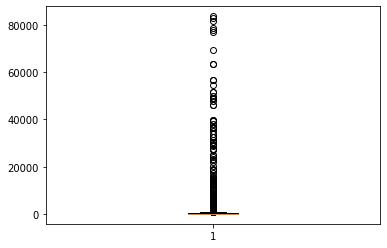

Active


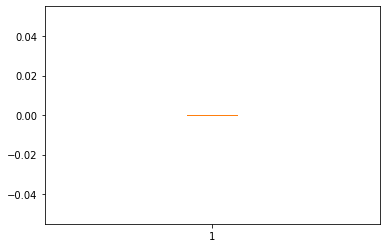

AdminUnit


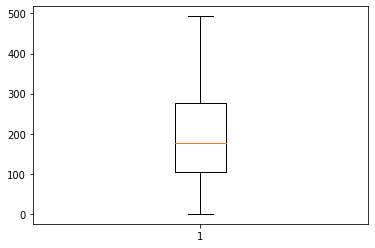

ArchiveYear


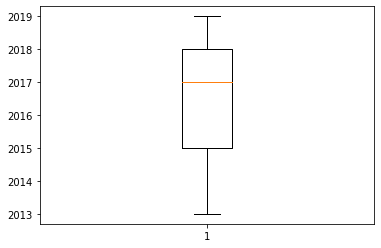

CalFireIncident


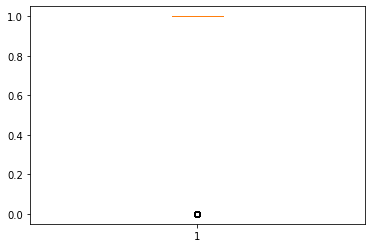

CanonicalUrl


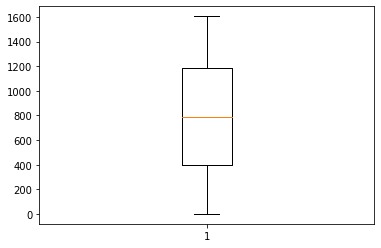

Counties


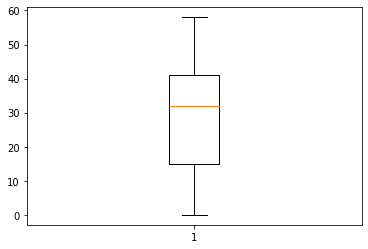

CountyIds


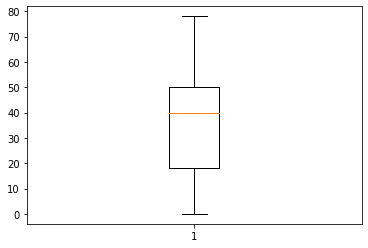

Extinguished


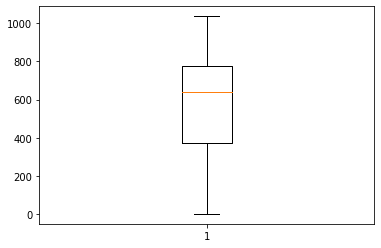

Featured


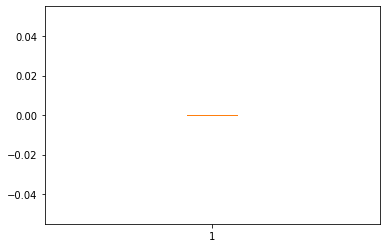

Final


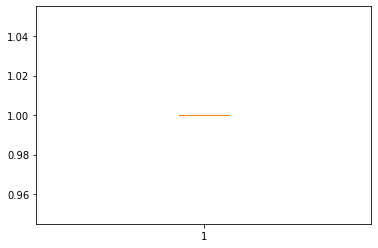

Latitude


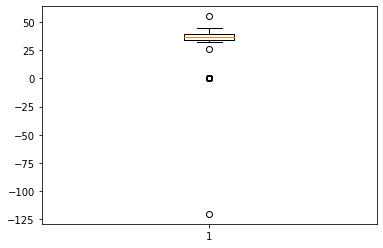

Location


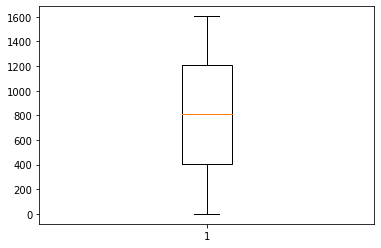

Longitude


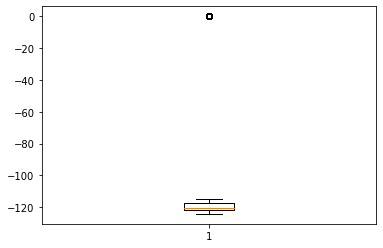

MajorIncident


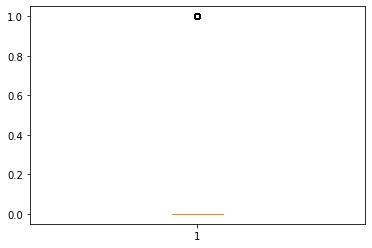

Name


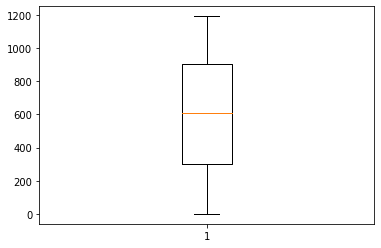

PercentContained


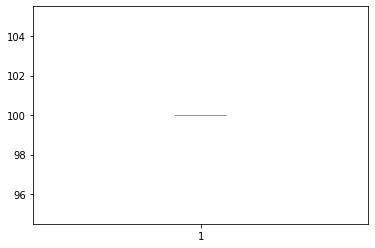

Public


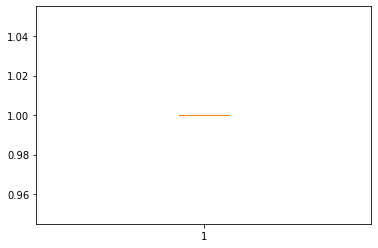

SearchDescription


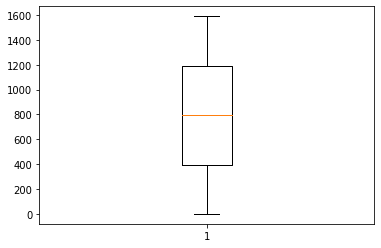

SearchKeywords


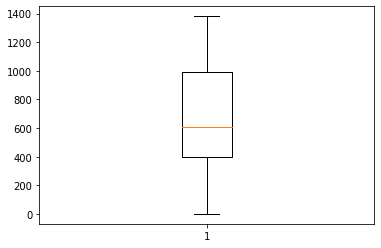

Started


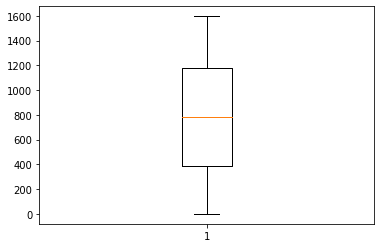

Status


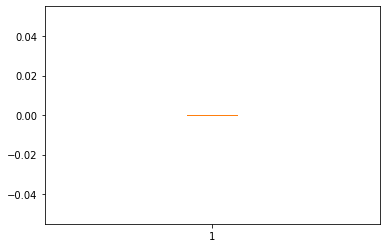

UniqueId


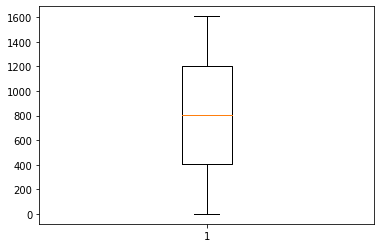

Updated


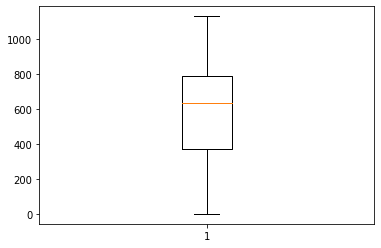

In [ ]:
for col in california_fire_incidents.columns:
    print(col)
    plt.boxplot(california_fire_incidents[col])
    plt.show()

## Converting data to appropriate types

In [ ]:
california_fire_incidents['Started'] = pd.to_datetime(california_fire_incidents['Started'])
california_fire_incidents['Updated'] = pd.to_datetime(california_fire_incidents['Updated'])
california_fire_incidents['Extinguished'] = pd.to_datetime(california_fire_incidents['Extinguished'])

california_fire_incidents['YearStarted'] = california_fire_incidents['Started'].dt.year
california_fire_incidents['MonthStarted'] = california_fire_incidents['Started'].dt.month
california_fire_incidents = california_fire_incidents[california_fire_incidents.YearStarted != 1969]

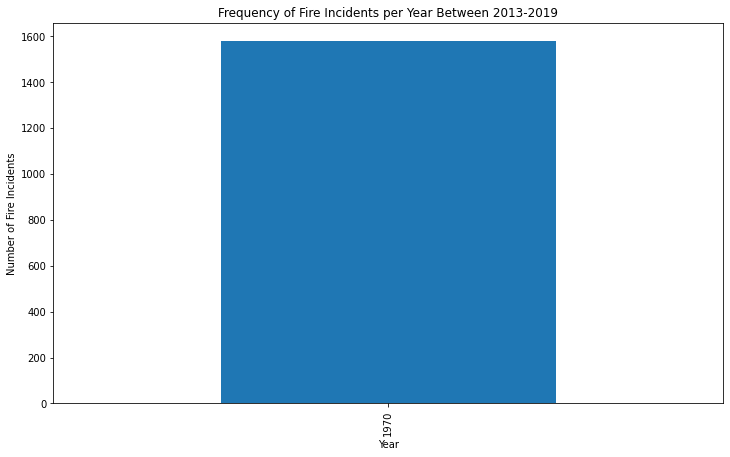

In [ ]:
california_fire_incidents['YearStarted'].value_counts().sort_index().plot(kind='bar', figsize=(12,7))

plt.xlabel('Year')
plt.ylabel('Number of Fire Incidents')
plt.title('Frequency of Fire Incidents per Year Between 2013-2019');

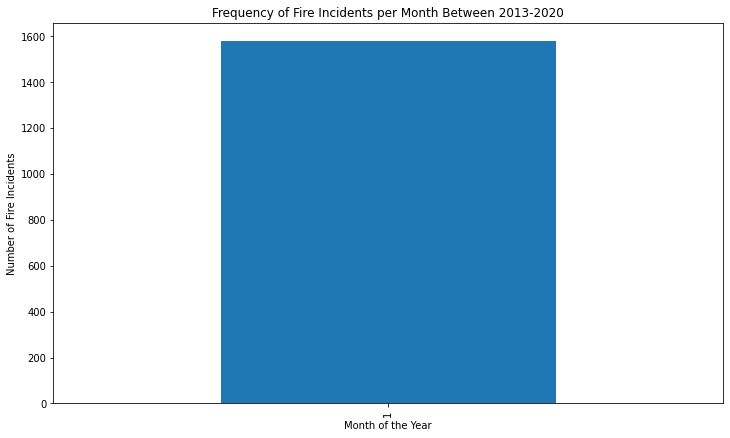

In [ ]:
california_fire_incidents['MonthStarted'].value_counts().sort_index().plot(kind='bar', figsize=(12,7))

plt.xlabel('Month of the Year')
plt.ylabel('Number of Fire Incidents')
plt.title('Frequency of Fire Incidents per Month Between 2013-2020');

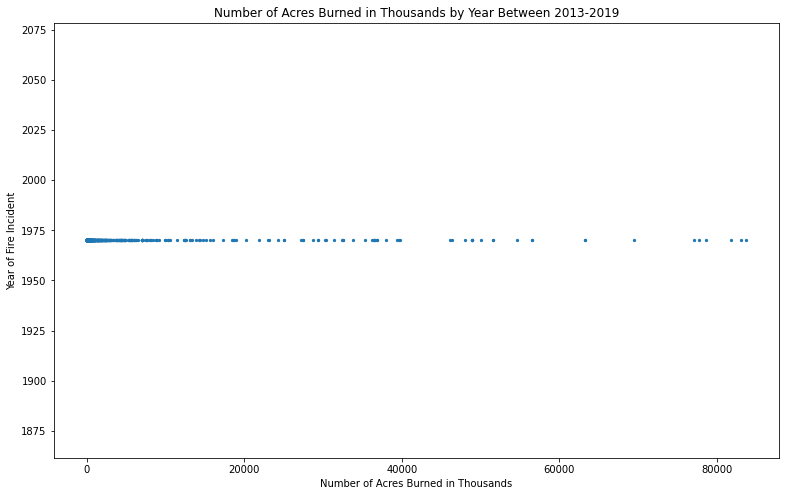

In [ ]:
california_fire_incidents.plot(kind='scatter', x='AcresBurned', y='YearStarted', figsize=(13,8), s=5)

plt.xlabel('Number of Acres Burned in Thousands')
plt.ylabel('Year of Fire Incident')
plt.title('Number of Acres Burned in Thousands by Year Between 2013-2019');

## Conclusion:
I was able to understand how to preprocess data as a preliminary before applying any model. EDA helps with understanding how you should preprocess your data.